313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9913
Precision: 0.9914
Recall: 0.9913
F1 Score: 0.9913


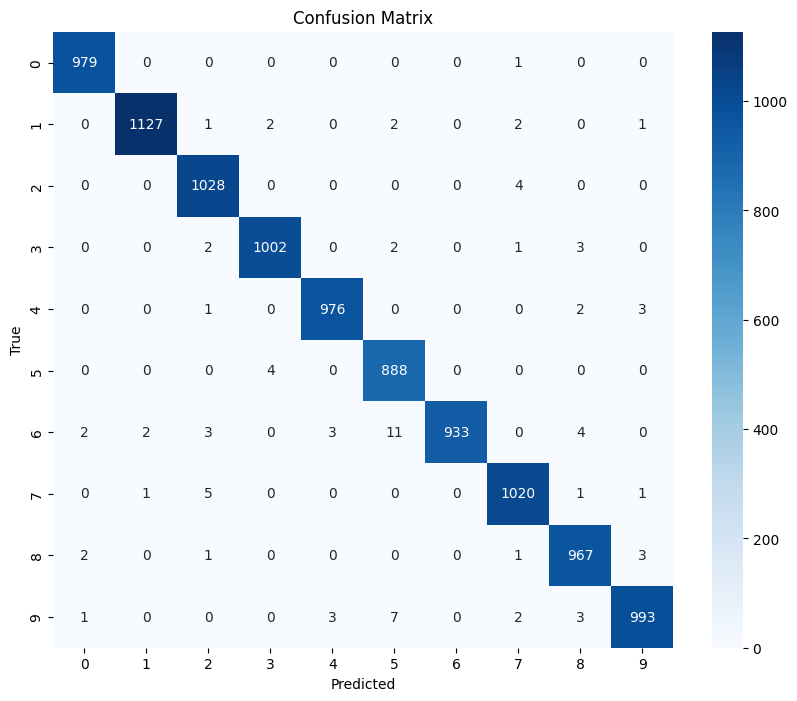

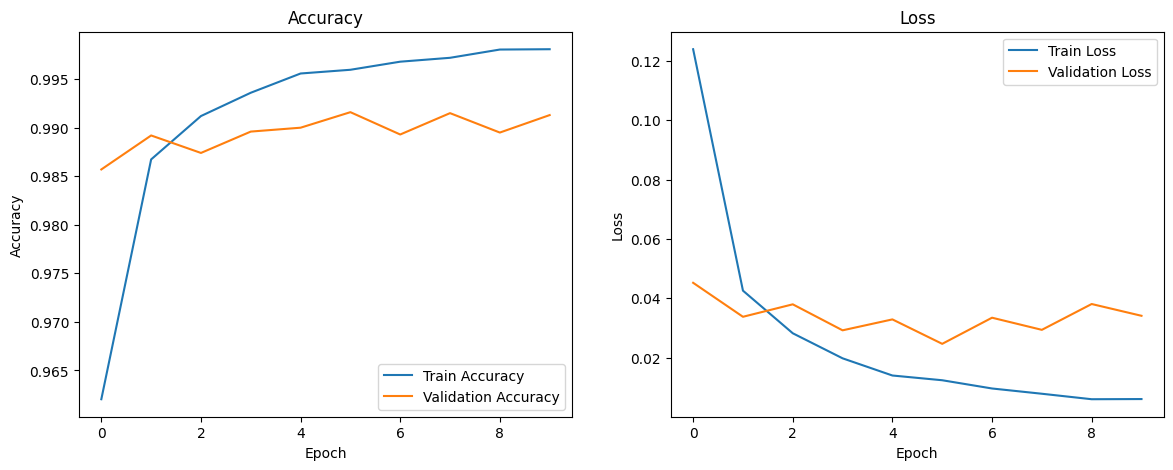

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Funciones auxiliares para cargar los datos en formato idx
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        num_images = int.from_bytes(f.read(4), byteorder='big')
        rows = int.from_bytes(f.read(4), byteorder='big')
        cols = int.from_bytes(f.read(4), byteorder='big')
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=np.uint8)
        return data.reshape(num_images, rows, cols, 1)

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        num_labels = int.from_bytes(f.read(4), byteorder='big')
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return labels

# Rutas de los archivos de datos y del modelo
model_path = os.path.join('..', 'model', 'mnist_model.h5')
test_images_path = os.path.join('..', 'data', 't10k-images.idx3')
test_labels_path = os.path.join('..', 'data', 't10k-labels.idx1')

# Cargar el modelo actualizado
model = load_model(model_path)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # Compilar el modelo

# Cargar los datos de prueba
test_images = load_images(test_images_path) / 255.0
test_labels = load_labels(test_labels_path)

# Convertir las etiquetas a one-hot encoding
test_labels = to_categorical(test_labels, num_classes=10)

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Obtener las predicciones del modelo
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calcular las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Mostrar las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Graficar la precisión y pérdida del entrenamiento
history_path = os.path.join('..', 'data', 'train_history.npz')
if os.path.exists(history_path):
    history = np.load(history_path)
    plt.figure(figsize=(14, 5))
    
    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.show()
else:
    print("No training history found.")
